Rylan Fowers

In [149]:
import numpy as np
from matplotlib import pyplot as plt
from scipy.stats import norm
from scipy.stats import invgamma
from statsmodels.tsa.stattools import acf
import seaborn as sns
from scipy.stats.mstats import mquantiles as q
from mpl_toolkits.mplot3d import Axes3D
from statsmodels.tsa.stattools import acf
from statsmodels.graphics.tsaplots import plot_acf
from pydataset import data
import warnings
warnings.filterwarnings('ignore')

In [173]:
def converg_plots(mu,sig2,title,burnins=50, beta1=None, beta2=None):
    mut = '$\mu_{'+title+'}$'
    sigt = '$\sigma^2_{'+title+'}$'
    
    if type(beta1) != NoneType:
        mut = '$\\beta_{0}$'

    # Raw Convergence Plots
    fig=plt.figure(figsize=(12, 4), dpi= 80, facecolor='w', edgecolor='k')
    ax1 = plt.subplot(121)
    ax2 = plt.subplot(122)
    ax1.plot(mu)
    ax1.set_title(mut)
    ax1.set_xlabel("Index")
    ax1.set_ylabel(mut)
    ax2.plot(sig2)
    ax2.set_title(sigt)
    ax2.set_xlabel("Index")
    ax2.set_ylabel("$\sigma^2$")
    plt.show()
    
    if type(beta1) != NoneType:
        # Raw Convergence Plots
        fig=plt.figure(figsize=(12, 4), dpi= 80, facecolor='w', edgecolor='k')
        ax1 = plt.subplot(121)
        ax2 = plt.subplot(122)
        ax1.plot(beta1)
        ax1.set_title("$\\beta_{1}$")
        ax1.set_xlabel("Index")
        ax1.set_ylabel("$\\beta_{1}$")
        if type(beta2) == NoneType:
            plt.show()
        else:
            ax2.plot(beta2)
            ax2.set_title("$\\beta_{2}$")
            ax2.set_xlabel("Index")
            ax2.set_ylabel("$\\beta_{2}$")
            plt.show()

    # ACF Pre-Burnin
    fig=plt.figure(figsize=(12, 4), dpi= 80, facecolor='w', edgecolor='k')
    ax1 = plt.subplot(121)
    ax1.plot(acf(mu), color='r')
    plt.suptitle("ACF for "+mut)
    ax2 = plt.subplot(122)
    plot_acf(mu,ax=ax2, title='', use_vlines=True)
    ax1.set_xlabel("Lag")
    ax1.set_ylabel("ACF")
    ax2.set_xlabel("Lag")
    ax2.set_ylabel("ACF")
    plt.show()
    
    if type(beta1) != NoneType:
        fig=plt.figure(figsize=(12, 4), dpi= 80, facecolor='w', edgecolor='k')
        ax1 = plt.subplot(121)
        ax1.plot(acf(beta1), color='orange')
        plt.suptitle("ACF for $\\beta_{1}$")
        ax2 = plt.subplot(122)
        plot_acf(beta1,ax=ax2, title='', use_vlines=True)
        ax1.set_xlabel("Lag")
        ax1.set_ylabel("ACF")
        ax2.set_xlabel("Lag")
        ax2.set_ylabel("ACF")
        plt.show()
        
    if type(beta2) != NoneType:
        fig=plt.figure(figsize=(12, 4), dpi= 80, facecolor='w', edgecolor='k')
        ax1 = plt.subplot(121)
        ax1.plot(acf(beta2))
        plt.suptitle("ACF for $\\beta_{2}$")
        ax2 = plt.subplot(122)
        plot_acf(beta2,ax=ax2, title='', use_vlines=True)
        ax1.set_xlabel("Lag")
        ax1.set_ylabel("ACF")
        ax2.set_xlabel("Lag")
        ax2.set_ylabel("ACF")
        plt.show()
    
    fig=plt.figure(figsize=(12, 4), dpi= 80, facecolor='w', edgecolor='k')
    ax1 = plt.subplot(121)
    ax1.plot(acf(sig2), color='g')
    plt.suptitle("ACF for "+sigt)
    ax2 = plt.subplot(122)
    plot_acf(sig2, ax=ax2, title='', use_vlines=True)
    ax1.set_xlabel("Lag")
    ax1.set_ylabel("ACF")
    ax2.set_xlabel("Lag")
    ax2.set_ylabel("ACF")
    plt.show()
    
    # ACF Post-Burnin
    fig=plt.figure(figsize=(12, 4), dpi= 80, facecolor='w', edgecolor='k')
    ax1 = plt.subplot(121)
    ax1.plot(acf(mu[0:-1:burnins]), color='r')
    plt.suptitle("Burn-in ACF for "+ mut )
    ax2 = plt.subplot(122)
    plot_acf(mu[0:-1:burnins],ax=ax2, title='', use_vlines=True)
    ax1.set_xlabel("Lag")
    ax1.set_ylabel("ACF")
    ax2.set_xlabel("Lag")
    ax2.set_ylabel("ACF")
    plt.show()
    
    if type(beta1) != NoneType:
        fig=plt.figure(figsize=(12, 4), dpi= 80, facecolor='w', edgecolor='k')
        ax1 = plt.subplot(121)
        ax1.plot(acf(beta1[0:-1:burnins]), color='orange')
        plt.suptitle("Burn-in ACF for $\\beta_{1}$")
        ax2 = plt.subplot(122)
        plot_acf(beta1[0:-1:burnins],ax=ax2, title='', use_vlines=True)
        ax1.set_xlabel("Lag")
        ax1.set_ylabel("ACF")
        ax2.set_xlabel("Lag")
        ax2.set_ylabel("ACF")
        plt.show()
    
    if type(beta2) != NoneType:
        fig=plt.figure(figsize=(12, 4), dpi= 80, facecolor='w', edgecolor='k')
        ax1 = plt.subplot(121)
        ax1.plot(acf(beta2[0:-1:burnins]))
        plt.suptitle("Burn-in ACF for $\\beta_{2}$")
        ax2 = plt.subplot(122)
        plot_acf(beta2[0:-1:burnins],ax=ax2, title='', use_vlines=True)
        ax1.set_xlabel("Lag")
        ax1.set_ylabel("ACF")
        ax2.set_xlabel("Lag")
        ax2.set_ylabel("ACF")
        plt.show()
    
    fig=plt.figure(figsize=(12, 4), dpi= 80, facecolor='w', edgecolor='k')
    ax1 = plt.subplot(121)
    ax1.plot(acf(sig2[0:-1:burnins]), color='g')
    plt.suptitle("Burn-in ACF for "+ sigt )
    ax2 = plt.subplot(122)
    plot_acf(sig2[0:-1:burnins], ax=ax2, title='', use_vlines=True)
    ax1.set_xlabel("Lag")
    ax1.set_ylabel("ACF")
    ax2.set_xlabel("Lag")
    ax2.set_ylabel("ACF")
    plt.show()

In [139]:
def post_plots(mu,sig2, prior_mu, prior_sig, title, domain1, domain2):
    mut = '$\mu_{'+title+'}$'
    sigt = '$\sigma^2_{'+title+'}$'
    
    fig=plt.figure(figsize=(12, 4), dpi= 80, facecolor='w', edgecolor='k')
    ax1 = plt.subplot(121)
    ax2 = plt.subplot(122)
    ax1.plot(domain1, prior_mu(domain1), label="Prior for "+mut)
    sns.distplot(mu, ax=ax1, hist=False,label="Posterior for "+mut)
    ax1.set_title("Prior and Posterior for "+mut)
    ax1.set_xlim(domain1[0], domain1[-1])
    ax1.legend()

    ax2.plot(domain2, prior_sig(domain2), label="Prior for "+sigt)
    sns.distplot(sig2,ax=ax2, hist=False, label="Posterior for "+sigt)
    ax2.set_title("Prior and Posterior for "+sigt)
    ax2.legend()
    ax1.set_xlabel("Value")
    ax1.set_ylabel("Density")
    ax2.set_xlabel("Value")
    ax2.set_ylabel("Density")
    ax2.set_xlim(domain2[0], domain2[-1])
    ax2.set_ylim(0, .000005)
    plt.tight_layout()
    plt.show()

# Problem 1

In [2]:
control = [3525,4321, 4763, 4899, 3234, 3469, 3439, 
           3658, 3385, 3226, 3671, 3501, 3842, 3998, 4004]

tmt = [3340, 4279, 4910, 4866, 3125, 3680, 3965, 3849,
3297, 3124, 3218, 3246, 4245, 4186, 3711]

## (a)

In [140]:
#prior distributions
m_t = 4000
v_t = 1000
m_c = 3500
v_c = 1000
a_t = 1
b_t= 1
a_c = 1
b_c = 1
mu_t = lambda x: norm.pdf(x, m_t, np.sqrt(v_t))
mu_c = lambda x: norm.pdf(x, m_c, np.sqrt(v_c))
sig2_t = lambda x: invgamma.pdf(x,a_t,b_t)
sig2_c = lambda x: invgamma.pdf(x,a_c,b_c)

In [141]:
#Treatment posterior
N = 10000
y_bar = np.mean(tmt) 
mu_t_post = np.ones(N)
mu_t_post[0] = 0
sig2_t_post = np.ones(N)
n = len(control)
sig2_t_post[0] = np.var(control)

for j in range(2, N):
    #update µ
    v_star = 1 / ((n/sig2_t_post[j-1]) + (1/v_t))
    m_star = v_star * ((n/sig2_t_post[j-1])*y_bar +(1/v_t)*m_t)
    mu_t_post[j] = np.random.normal(m_star, np.sqrt(v_star), 1) #in r it's rnorm(n=1, m_star, np.sqrt(v_star))
    
    #update sigma2
    a_star = 0.5*n +a_t
    b_star = .5*np.sum([(k - mu_t_post[j])**2 for k in control]) + b_t
    theta_star = 1/b_star #in python it wants the scale
    sig2_t_post[j] = 1/np.random.gamma(a_star, scale=theta_star, size=1)
    
    

To provide evidence that the algorithm converged, we will use the ACF. If the ACF converges by staying within bounds then the algorithm converged.
<br><br> In the first plot we have just the raw data plotted. In the next graph we have the ACF (computed with an acf function and a plot acf function in python), and last we have the ACF again, but this time with burnins removed (for this example we removed every 50th term.)

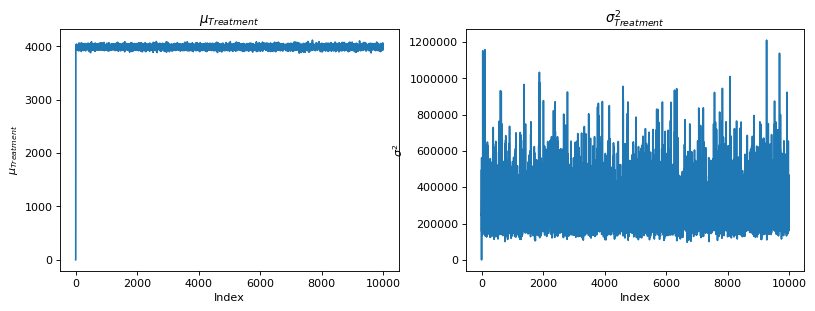

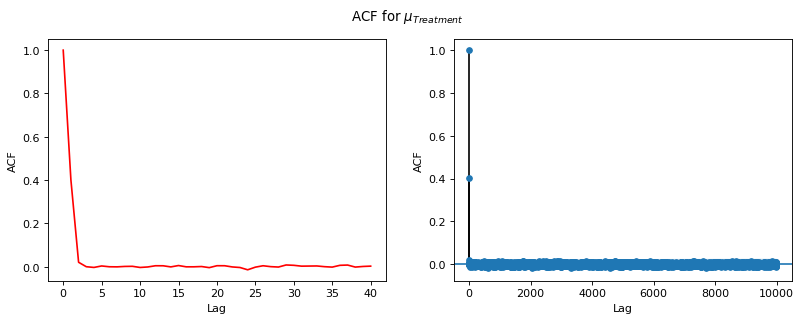

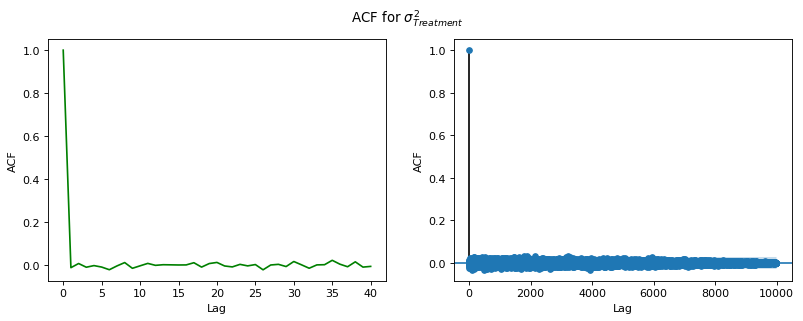

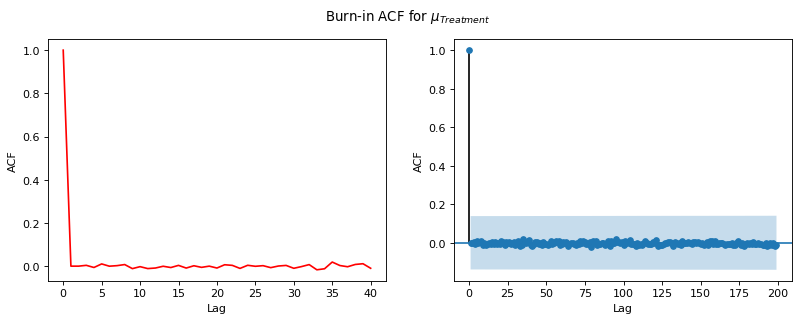

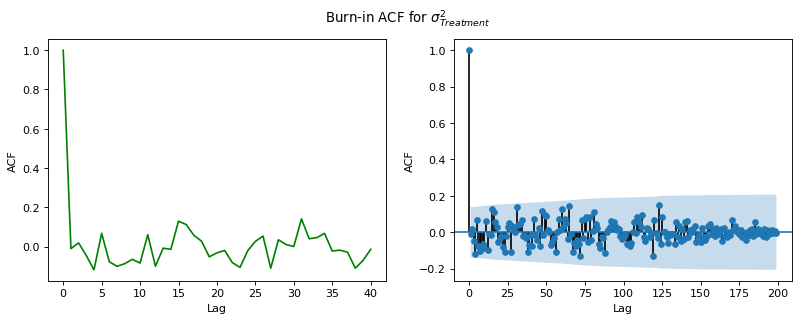

In [147]:
converg_plots(mu_t_post, sig2_t_post, title = "Treatment")

In [58]:
#Control posterior
N = 10000
y_bar = np.mean(control) 
mu_c_post = np.ones(N)
mu_c_post[0] = 0
sig2_c_post = np.ones(N)
n = len(control)
sig2_c_post[0] = np.var(control)

for j in range(2, N):
    #update µ
    v_star = 1 / ((n/sig2_c_post[j-1]) + (1/v_c))
    m_star = v_star * ((n/sig2_c_post[j-1])*y_bar +(1/v_c)*m_c)
    mu_c_post[j] = np.random.normal(m_star, np.sqrt(v_star), 1) #in r it's rnorm(n=1, m_star, np.sqrt(v_star))
    
    #update sigma2
    a_star = 0.5*n +a_c
    b_star = .5*np.sum([(k - mu_t_post[j])**2 for k in control]) + b_c
    theta_star = 1/b_star #in python it wants the scale
    sig2_c_post[j] = 1/np.random.gamma(a_star, scale=theta_star, size=1)
    
    

Just as we did before, let's check the convergence of the control group paramters.

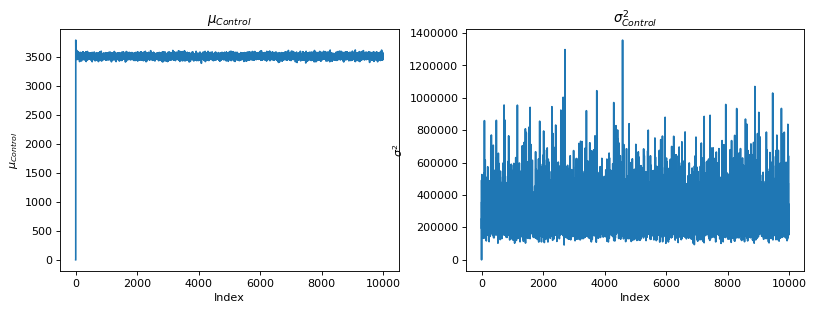

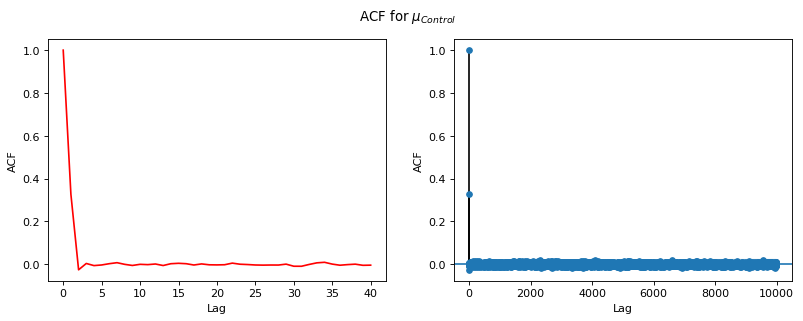

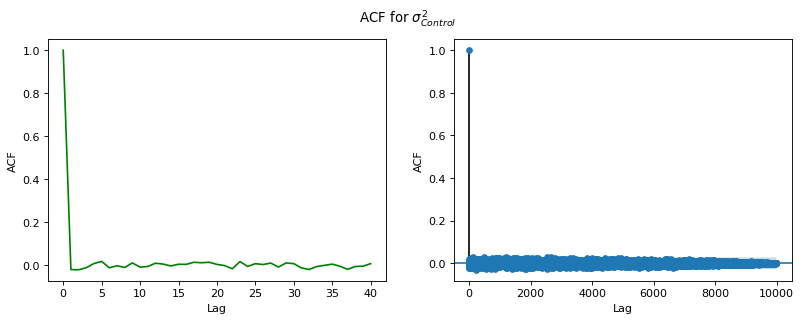

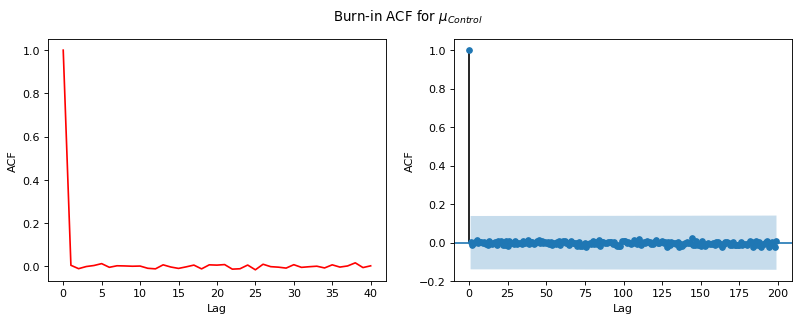

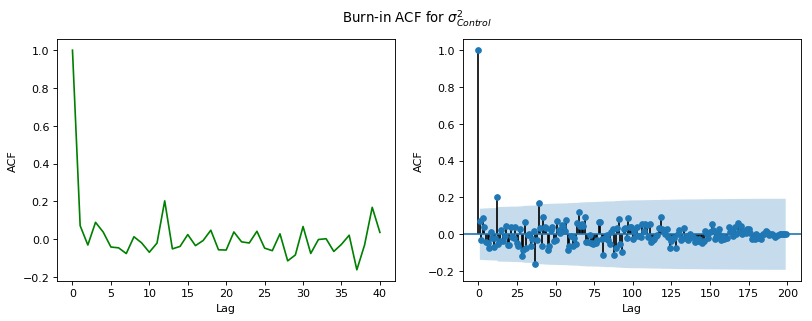

In [148]:
converg_plots(mu_c_post, sig2_c_post, title = "Control")

## (b)

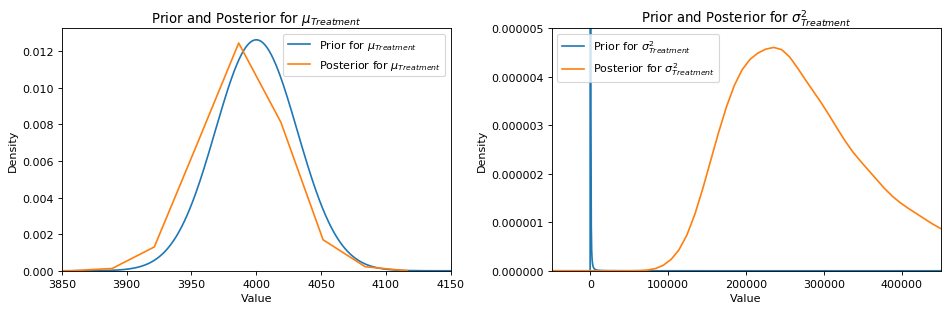

In [110]:
x = np.linspace(3850,4150,1000)
y = np.linspace(-50000,450000,1000)
post_plots(mu_t_post,sig2_t_post, mu_t, sig2_t, 'Treatment', x, y)


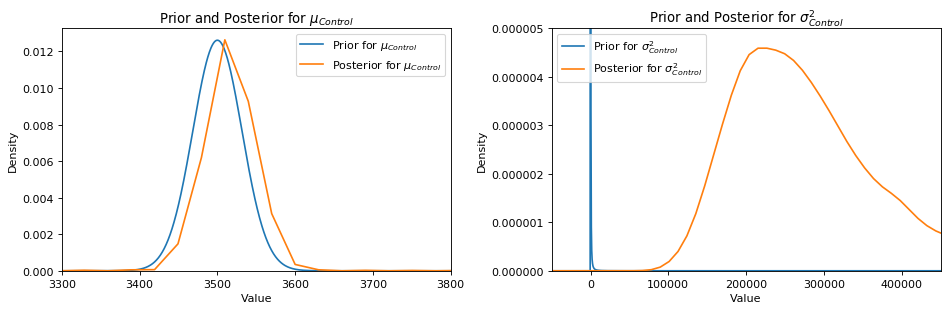

In [112]:
x = np.linspace(3300,3800,1000)
y = np.linspace(-50000,450000,1000)
post_plots(mu_c_post,sig2_c_post, mu_c, sig2_c, 'Control', x, y)


## (c)

In [120]:
mean_mu_t_post = np.mean(mu_t_post[::50])
mean_mu_c_post = np.mean(mu_c_post[::50])

# 95% credible interval for the difference between means
inter = q(mu_c_post[::50] - mu_t_post[::50], [0.025, 0.975])

print(mean_mu_c_post)
print(mean_mu_t_post)
print(inter)

3496.534332190093
3971.3557401340936
[-563.23061929 -382.59273577]


The porbability that the true difference in yield in milk for cows not treated and cows treated with a supplment falls between [-563.2, -382.59] is 95%.
<br><br> Therefore, we conclude, we have good reason to reject the null hypothesis and with high probability predict that $\mu_{c} - \mu_{t} < 0$

## (d)

### i.

Because $\sigma^{2}$ is known, our prior will only be for $\mu_{d}$. This prior will be normally distributed. For the normal distribution we will have the mean be 0, to coincide with the null hypothesis. Also, we will have the variance be $7.5^{2}$ to go along with the belief that 95% should be within ±15. To justify this we use the empircal rule, and make ±15 be two standard deviations away, and therefore choose the variance to be $\sigma^{2} = 7.5^{2} \implies \sigma = 7.5$

### ii.

The assumption for normality of differences is sensible. We know that a normal plus a normal is also a normal. We will show briefly that the difference of two normals is also normal.

<dr> Let $Q \sim \mathcal{N}(\mu_{1}, \sigma^{2}_{1})$ be an arbitrary normal. Because a normal plus a normal is also normal, it follows that $Q$ can be written as the sum of two normals $\implies Q \sim \mathcal{N}(\mu_{1}, \sigma^{2}_{1}) = \mathcal{N}(\mu_{a}, \sigma^{2}_{a}) + \mathcal{N}(\mu_{b}, \sigma^{2}_{b})$
<br>$\implies \mathcal{N}(\mu_{1}, \sigma^{2}_{1}) - \mathcal{N}(\mu_{b}, \sigma^{2}_{b}) = \mathcal{N}(\mu_{a}, \sigma^{2}_{a})$
<br> Therefore, the difference of two normals is also normal, and the asumption for normality in differences is sensible. $\blacksquare$

### iii.

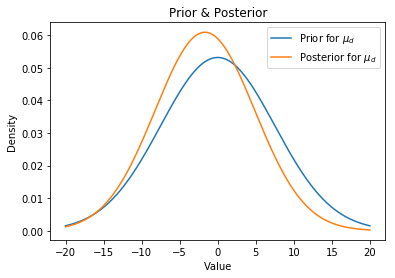

0.5156465719185707
[-14.93463523  11.06038661]


In [136]:
m_d = 0
v_d = (7.5)**2
sig2_d = 2702
y = np.array(control) - np.array(tmt)
y_bar = np.mean(y)
n = len(y)

m_d_star = (n*v_d*y_bar + sig2_d*m_d) / (n*v_d + sig2_d)
v_d_star = (v_d*sig2_d) / (n*v_d + sig2_d)

d_prior = lambda x: norm.pdf(x, m_d, np.sqrt(v_d))
d_post = lambda x: norm.pdf(x, m_d_star, np.sqrt(v_d_star))

x = np.linspace(-20,20,10000)
plt.plot(x, d_prior(x), label="Prior for $\mu_{d}$")
plt.plot(x, d_post(x), label="Posterior for $\mu_{d}$")
plt.legend()
plt.title("Prior & Posterior")
plt.xlabel("Value")
plt.ylabel("Density")
plt.show()

print(norm.cdf(0, m_d_star, v_d_star))
inter = q(np.random.normal(m_d_star, np.sqrt(v_d_star), 10000), [.025,.975])
print(inter)



The posterior probability that $\mu_{d} < 0$ is 52%. Also, the 95% credible interval for $mu_{d}$ is [-14.9, 11.1].
<br> Because the probability is low, and the 95% credible interval contains 0, it is not a good idea to reject the null hypothesis.

## (e)

The analysis is part (d) is less appropriate in this scenario for many reasons:
<br><br>
1. It is unrealistic to have a known variance when the mean is not known.
<br>
2. The Gibbs sampling and monte carlo methods in the first test allow more information to be taken from the small data sample.
<br>
3. Because the sample data was small, the posterior in part (d) was not changed enough to make good conclusions.

# Problem 2

## (a)

$\pi(\beta_{2} | \beta_{0} , \beta_{1}, \sigma^{2}, y_{1},...,y_{n}) \propto \pi(\beta_{2}) f(y_{1},...,y_{n} |\beta_{0}, \beta_{1}, \sigma^{2})$

$= \frac{1}{\sqrt{2\pi v^{2}_{2}}}$
$exp\Big(-\frac{1}{2v_{2}}(\beta_{2}-m_{2})^{2}\Big)$
$\Pi^{n}_{i=1} \frac{1}{\sqrt{2\pi \sigma^{2}}}exp\Big( -\frac{1}{2\sigma^{2}} (y_{i} - [\beta_{2}x_{2i} + \beta_{0}+ \beta_{1}x_{1i}])^{2} \Big)$

$\propto$
$exp\Big(-\frac{1}{2v_{2}}(\beta_{2}-m_{2})^{2}\Big)$
$exp\Big(-\frac{1}{2\sigma^{2}} \Sigma^{n}_{i=1} (y_{i} - [\beta_{2}x_{2i} + \beta_{0}+ \beta_{1}x_{1i}])^{2}\Big)$

$=exp\Big(-\frac{1}{2v_{2}}(\beta_{2}-m_{2})^{2}-\frac{1}{2\sigma^{2}} \Sigma^{n}_{i=1} (y_{i} - [\beta_{2}x_{2i} + \beta_{0}+ \beta_{1}x_{1i}])^{2}\Big)$

$=exp\Big(-\frac{1}{2v_{2}}(\beta_{2}^{2}-2\beta_{2}m_{2} + m_{2}^{2})-\frac{1}{2\sigma^{2}} \Sigma^{n}_{i=1} (y_{i}^{2} + \beta_{2}^{2}x_{2i}^{2} + 2\beta_{2}x_{2i}\beta_{0} + 2\beta_{2}x_{2i}\beta_{1}x_{1i} + \beta_{0}^{2} + 2\beta_{0}\beta_{1}x_{1i} + \beta_{1}^{2}x_{1i}^{2} - 2y_{i}[\beta_{2}x_{2i} + \beta_{0}+ \beta_{1}x_{1i}]) \Big)$




$\propto exp\Big(-\frac{1}{2v_{2}}(\beta_{2}^{2}-2\beta_{2}m_{2})-\frac{1}{2\sigma^{2}} \Sigma^{n}_{i=1} (\beta_{2}^{2}x_{2i}^{2} + 2\beta_{2}x_{2i}\beta_{0} + 2\beta_{2}x_{2i}\beta_{1}x_{1i} - 2y_{i}\beta_{2}x_{2i} \Big)$

$= exp\Big(-\frac{1}{2} \big[ \beta_{2}^{2} (\frac{1}{\sigma^{2}}\Sigma_{i=1}^{n} x_{2i}^{2} + \frac{1}{v_{2}}) - 2\beta_{2}(\frac{1}{\sigma^{2}} \Sigma_{i=1}^{n} x_{2i} (y_{i} - \beta_{0} - \beta_{1}x_{1i}) + \frac{m_{2}}{v_{2}} )\big]\Big)$

$= exp\Big(-\frac{1}{2} \big[ \beta_{2}^{2} (\frac{1}{\sigma^{2}}\Sigma_{i=1}^{n} x_{2i}^{2} + \frac{1}{v_{2}}) - 2\beta_{2}(\frac{1}{\sigma^{2}} \Sigma_{i=1}^{n} x_{2i} (y_{i} - [\beta_{0} + \beta_{1}x_{1i}]) + \frac{1}{v_{2}} m_{2})\big]\Big)$

$\propto exp\Big( -\frac{1}{2}(\frac{1}{\sigma^{2}}\Sigma_{i=1}^{n} x_{2i}^{2} + \frac{1}{v_{2}}) \Big[\beta_{2}^{2} - 2\beta_{2} \big[\frac{\frac{1}{\sigma^{2}} \Sigma_{i=1}^{n} x_{2i} (y_{i} - [\beta_{0} + \beta_{1}x_{1i}]) + \frac{1}{v_{2}} m_{2}}{\frac{1}{\sigma^{2}}\Sigma_{i=1}^{n} x_{2i}^{2} + \frac{1}{v_{2}}}\big] + \big[\frac{\frac{1}{\sigma^{2}} \Sigma_{i=1}^{n} x_{2i} (y_{i} - [\beta_{0} + \beta_{1}x_{1i}]) + \frac{1}{v_{2}} m_{2}}{\frac{1}{\sigma^{2}}\Sigma_{i=1}^{n} x_{2i}^{2} + \frac{1}{v_{2}}}\big]^{2}\Big]\Big)$

$\implies$
$\pi(\beta_{2} | \beta_{0} , \beta_{1}, \sigma^{2}, y_{1},...,y_{n}) = \mathcal{N} \Big( \frac{\frac{1}{\sigma^{2}} \Sigma_{i=1}^{n} x_{2i} (y_{i} - [\beta_{0} + \beta_{1}x_{1i}]) + \frac{1}{v_{2}} m_{2}}{\frac{1}{\sigma^{2}}\Sigma_{i=1}^{n} x_{2i}^{2} + \frac{1}{v_{2}}}, \frac{1}{\frac{1}{\sigma^{2}}\Sigma_{i=1}^{n} x_{2i}^{2} + \frac{1}{v_{2}}} \Big)$

## (b)

In [176]:
#data
pima = data("Pima.tr")
Y = pima['bp'].values
X1 = pima['bmi'].values
X2 = pima['age'].values

#priors
m0 = 0
v0 = 100**2
m1 = 0
v1 = 100**2
m2 = 0
v2 = 100*2 
a = 1
b = 1

#Empty vectors to hold MCMC iterates
N=10000
beta0 = np.zeros(N)
beta1 = np.zeros(N)
beta2 = np.zeros(N)
sig2 = np.zeros(N)

#Starting values 
n = len(Y)
beta0[0] = 0
beta1[0] = 0
sig2[0] = 1
sumx12 = sum(X1**2)
sumx22 = sum(X2**2)


for j in range(1, N):
    #Update Beta 0
    vstar = 1/(n/sig2[j-1] + 1/v0)
    mstar = (vstar)*((1/sig2[j-1])*sum(Y-beta1[j-1]*X1-beta2[j-1]*X2) + (1/v0)*m0)
    beta0[j] = np.random.normal(mstar, np.sqrt(vstar), 1)
    
    #Update Beta 1
    vstar = 1/(sumx12/sig2[j-1] + 1/v1)
    mstar = (vstar)*((1/sig2[j-1])* sum(X1*(Y-beta0[j] - beta2[j-1]*X2)) + (1/v1)*m1)
    beta1[j] = np.random.normal(mstar, np.sqrt(vstar), 1)
    
    #Update Beta 2
    vstar = 1/(sumx22/sig2[j-1] + 1/v2)
    mstar = (vstar)*((1/sig2[j-1])* sum(X2*(Y-beta0[j] - beta1[j]*X1)) + (1/v2)*m2)
    beta2[j] = np.random.normal(mstar, np.sqrt(vstar), 1)
    
    #Update Sigma 2
    astar = a + 0.5*n
    bstar = 0.5*np.sum((Y - (beta0[j] + beta1[j]*X1 +beta2[j]*X2))**2) + b
    sig2[j] = 1/np.random.gamma(astar, scale=1/bstar, size =1)
    
    

To provide evidence that the algorithm converged, we will again use the ACF. If the ACF converges by staying within bounds then the algorithm converged.
<br><br> In the first plots we have just the raw data plotted. In the next graph we have the ACF (computed with an acf function and a plot acf function in python), and last we have the ACF again, but this time with burnins removed (for this example we removed every 50th term.)

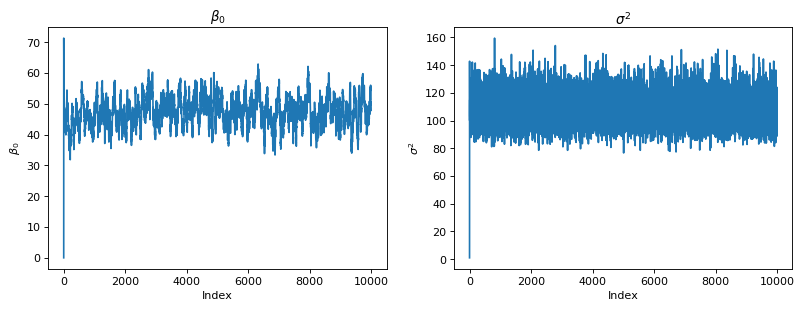

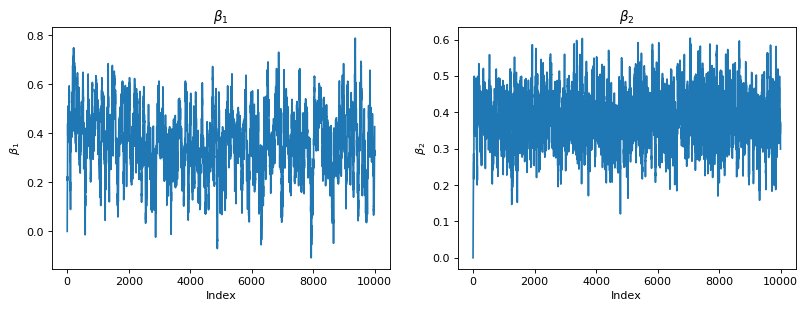

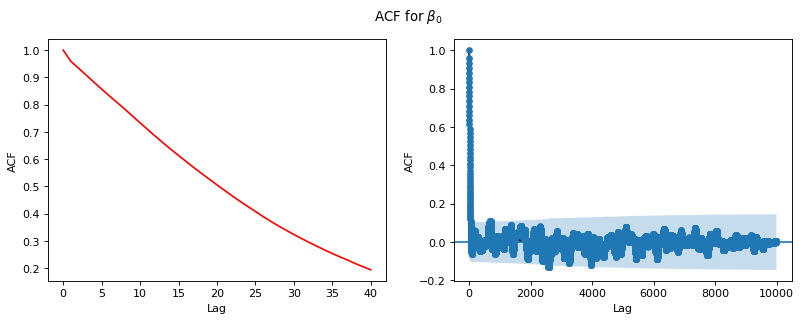

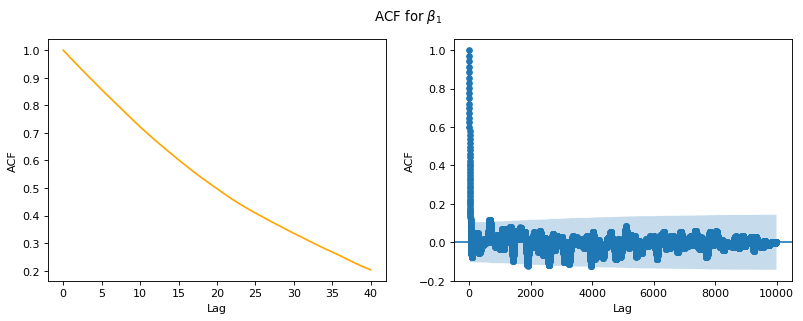

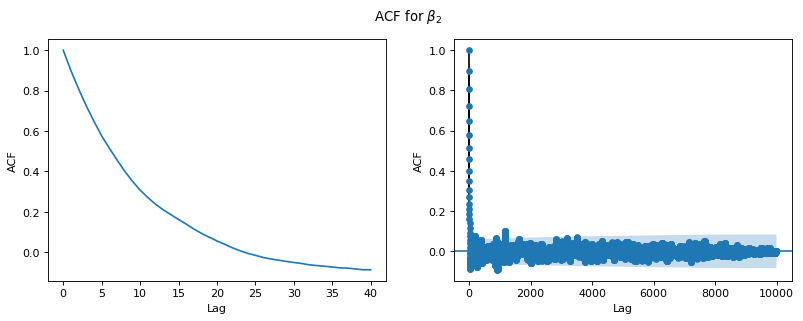

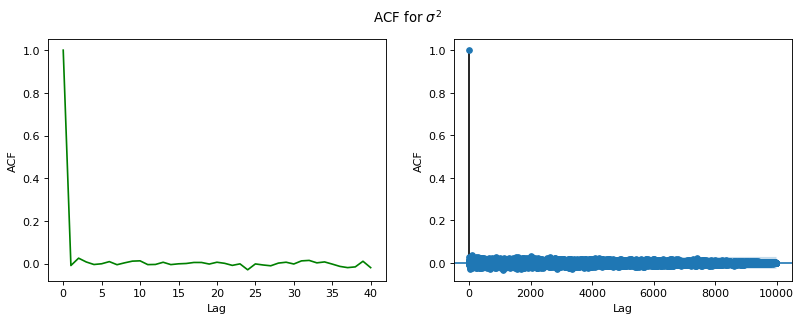

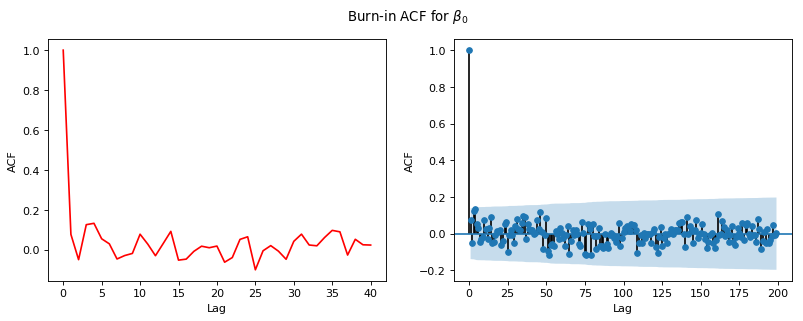

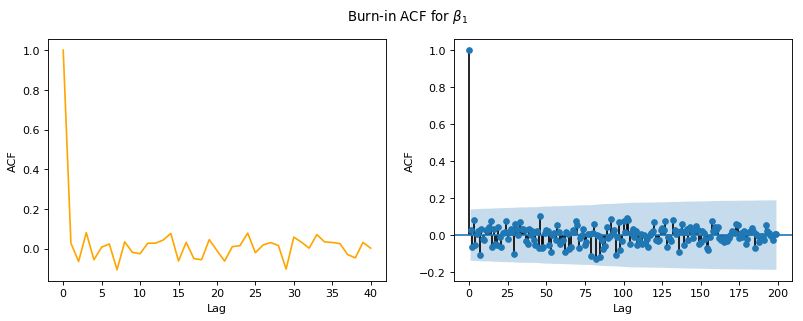

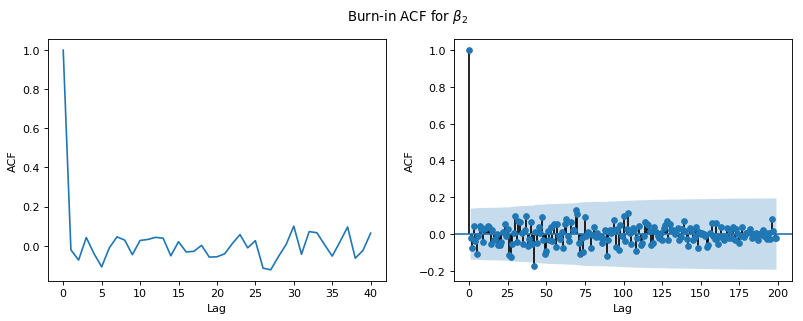

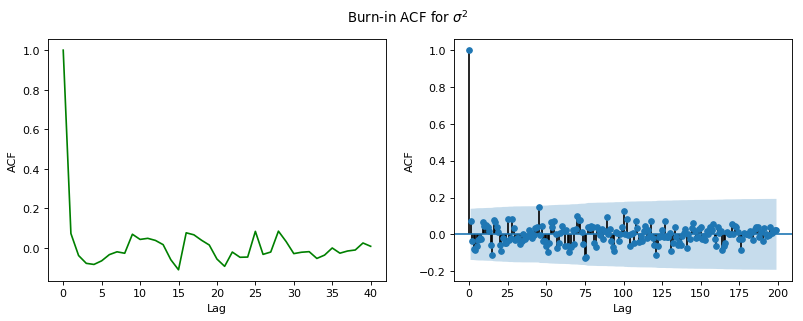

In [177]:
converg_plots(beta0,sig2,title='',burnins=50, beta1=beta1, beta2=beta2)

## (c)

In [178]:
print(q(beta2, [.025, .975]))

[0.24391049 0.51547148]


The probability that $\beta_{2}$ (for a regression with $y_{i} = \beta_{0} + beta_{1}x_{1i} + \beta_{2}x_{2i} +\epsilon_{i}$ where $y_{i}$ is the blood pressure, $x_{1i}$ is BMI of Pima women and $x_{2i}$ is age of Pima women) falls between [.24, .52] is 95%

## (d)

In [179]:
print(q(beta2/beta1, [.025, .975]))

[0.51321984 3.93158936]


The probability that the ratio $\beta_{2}/\beta_{1}$ (for a regression with $y_{i} = \beta_{0} + beta_{1}x_{1i} + \beta_{2}x_{2i} +\epsilon_{i}$ where $y_{i}$ is the blood pressure, $x_{1i}$ is BMI of Pima women and $x_{2i}$ is age of Pima women) falls between [.51, 3.93] is 95%

# Problem 3

When you collect data, your belief about something is updated. When more data is collected, you add to that belief. In otherwords, if I have a prior that I update to a posterior, after I observe data, when I observe more data, my new prior will be the posterior. Hence, today's posterior is tomorrow's prior. Bayesian statistics is all about adding to belief. So, everytime new data is obeserved our posterior becomes a prior. That way we can find an even newer posterior. 

# Problem 4

## (a)

This is random draws which come from the posterior distribution $\sigma^{2} \sim \mathcal{IG}(a^{*}, b^{*})$ with support $x \in (0, \infty)$ 

## (b)

This is coming from the posterior predictive distribution $\mathcal{N}(10, \sqrt{\sigma^{2}})$ where $\sigma^{2} \sim \mathcal{IG}(a^{*}, b^{*})$. The support of this distribution is $x \in \mathbb{R}$